In [ ]:
# 딥러닝 관련 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# MNIST 데이터셋 불러오기
mnist = keras.datasets.mnist

In [ ]:
# MNIST 데이터셋 학습용(x,y), 테스트용(x,y)으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 학습용 데이터 형태 살펴보기
x_train.shape

(60000, 28, 28)

In [ ]:
# 학습용 첫 번째 데이터 살펴보기1
x_train[0]

In [ ]:
for x in x_train[0]:
  for i in x:
    print('{:3} '.format(i), end=' ')
  print()

  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
  0    0    0    0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127    0    0    0    0  
  0    0    0    0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64    0    0    0    0  
  0    0    0

In [ ]:
# 학습용 첫 번째 데이터 살펴보기
y_train[0]

5

In [ ]:
# 데이터 전처리(0 ~ 1 사이 숫자로)
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# 데이터 전처리 결과 확인
x_train[0]

#모델 구축
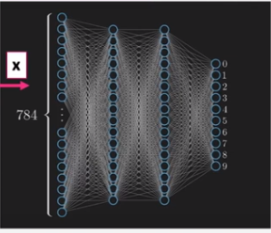

In [ ]:
# 모델 만들기 : 입력층(784) - 은닉층1(256) - 은닉층2(128) - 은닉층3(64) - 출력층(10)
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(256, activation = 'relu'))  # ReLU는 정류 선형 유닛(Rectified Linear Unit 렉티파이드 리니어 유닛)이다. 입력값이 0보다 작으면 0으로 출력, 0보다 크면 입력값 그대로 출력하는 유닛
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 확률을 출력해준다, Softmax는 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수

In [ ]:
# 모델 컴파일 : 최적화 함수(보통 adam(Adaptive + momentum estimation),  SGD(확률적 경사하강), 손실 함수(실제값과 예측값과의 차이) 설정 + 평가 지표 설정 + 가중치 초기화)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


#콜백 준비(1)
- 코랩에서 실행, 모델저장과 복원을 한 프로그램에서 수행
- 코랩은 구글 드라이브를 일부만 허용하는 등 사용을 제약함

In [ ]:
# Google Drive 에 모델을 저장하기 위해 Colab의 /content/gdrive/ 에 Google Drive 마운트 시킴

from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# 마운트된 Google Drive 의 working directory 이동

import os

checkpoint_path = 'save_restore'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Google Drive 에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()  # save current dir

try:

    os.chdir(colab_default_dir)

    if not os.path.exists(checkpoint_path):
        os.mkdir(checkpoint_path)

    os.chdir(checkpoint_path)  # change working dir
    print('current dir = ', os.getcwd())

except Exception as err:
    
    os.chdir(original_dir)
    print(str(err))

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

current dir =  /content/gdrive/My Drive/Colab Notebooks/save_restore


# 콜백 준비(2)- 위를 실행한 경우는 실행하지 말것
- 코랩에서 구글 드라이브 연결하지 않고, 구글 드라이브 들별한 디렉토리 바로 쓰고 읽기

In [ ]:
#import os

#checkpoint_path = "save_restore"
#checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                 verbose=1)

In [ ]:
# 모델 학습 : 전체 데이터는 5번 반복
model.fit(x_train, y_train, epochs = 5, callbacks=[cp_callback])  # 콜백을 훈련에 전달합니다

Epoch 1/5
1868/1875 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9362
Epoch 00001: saving model to save_restore
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2122 - accuracy: 0.9363
Epoch 2/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.0910 - accuracy: 0.9724
Epoch 00002: saving model to save_restore
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0910 - accuracy: 0.9724
Epoch 3/5
1868/1875 [============================>.] - ETA: 0s - loss: 0.0644 - accuracy: 0.9798
Epoch 00003: saving model to save_restore
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0643 - accuracy: 0.9799
Epoch 4/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.9848
Epoch 00004: saving model to save_restore
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0483 - accuracy: 0.9848
Epoch 5/5
1864/1875 [============================>.] - ETA: 0s - loss: 0.0403 - 

In [ ]:
# 모델초기화하고 가중치 로드없이  모델 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.3414 - accuracy: 0.0987


[2.3413753509521484, 0.09870000183582306]

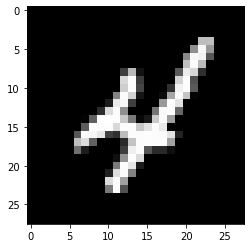

In [ ]:
# 예측 - 8번째 숫자 이미지로 보기
plt.imshow(x_train[9], cmap='gray')
plt.show()

In [ ]:
# 예측 - 8번째 숫자 예측하기1
print(model.predict(x_train[9].reshape(1, 28, 28)))

[[3.55195677e-14 5.61768080e-13 1.44975325e-11 3.61747351e-12
  1.00000000e+00 6.17341178e-11 5.76034706e-11 2.61081295e-11
  3.53940813e-12 1.30629445e-08]]


In [ ]:
# 예측 - 8번째 숫자 예측하기1
print(np.argmax(model.predict(x_train[9].reshape(1, 28, 28))))

4


In [ ]:
#-----------------끝-------------------------